<a href="https://colab.research.google.com/github/ShanaazAhamed/AttendanceReminder/blob/main/sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import pandas as pd

In [118]:
file = 'Book1.xlsx'

In [119]:
xl = pd.ExcelFile(file)

In [120]:
print(xl.sheet_names)

['Sheet1', 'Sheet2', 'Sheet3']


In [121]:
df1 = xl.parse('Sheet1')

In [122]:
df1.head()

,RSRP_avg_Serving,RSRQ_avg_Serving,geohash,cellid_Serving,dlearfcn,latitude,longitude,MR_count,time_key,Cellid_Nb1,RSRP_Nb1,Cellid_Nb2,RSRP_Nb2,Cellid_Nb3,RSRP_Nb3,Cellid_Nb4,RSRP_Nb4
0,-113.5,-10.8,tc3e5nbf,6306561.0,1650.0,7.596059,80.99234,1076.0,20230106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-103.1,-12.4,tc32w13c,6097921.0,1650.0,7.126215,80.77420,215.0,20230106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-102.3,-13.8,tc1x1v65,5836045.0,1650.0,6.884930,80.93927,102.0,20230106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-104.1,-9.8,tc1n80hk,5374229.0,1800.0,6.768383,80.16220,22.0,20230106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-104.5,-11.4,tc152n3x,5440770.0,1650.0,6.231823,80.15860,924.0,20230106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
arr = df1['cellid_Serving'].unique()

In [124]:
len(arr)

16

In [125]:
!pip install pygeohash==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
import pygeohash as pgh

In [127]:
pgh.encode(42.6, -5.6,precision=8)

'ezs42e44'

In [128]:
df = df1.groupby('geohash')

In [129]:
df = df.first()

In [130]:
df.head()

,RSRP_avg_Serving,RSRQ_avg_Serving,cellid_Serving,dlearfcn,latitude,longitude,MR_count,time_key,Cellid_Nb1,RSRP_Nb1,Cellid_Nb2,RSRP_Nb2,Cellid_Nb3,RSRP_Nb3,Cellid_Nb4,RSRP_Nb4
geohash,,,,,,,,,,,,,,,,
tc0ys802,-92.6,-9.6,6651412.0,500.0,6.767664,80.003020,541.0,20230106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tc0yun7q,-99.3,-7.3,6427425.0,41490.0,6.846929,79.984955,6.0,20230106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tc0yyuce,-103.2,-8.9,5435140.0,500.0,6.838281,80.103485,19.0,20230106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tc0yyz4k,-101.9,-12.1,5435137.0,500.0,6.850812,80.104706,17.0,20230106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tc148bd7,-92.0,-8.2,5350659.0,1650.0,6.067793,80.192587,350.0,20230106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
import numpy as np

In [132]:
df['RSRP_Nb1'] = df['RSRP_avg_Serving'] - np.random.randint(1, 6, df.shape[0])

In [133]:
df.head()

,RSRP_avg_Serving,RSRQ_avg_Serving,cellid_Serving,dlearfcn,latitude,longitude,MR_count,time_key,Cellid_Nb1,RSRP_Nb1,Cellid_Nb2,RSRP_Nb2,Cellid_Nb3,RSRP_Nb3,Cellid_Nb4,RSRP_Nb4
geohash,,,,,,,,,,,,,,,,
tc0ys802,-92.6,-9.6,6651412.0,500.0,6.767664,80.003020,541.0,20230106.0,NaN,-96.6,NaN,NaN,NaN,NaN,NaN,NaN
tc0yun7q,-99.3,-7.3,6427425.0,41490.0,6.846929,79.984955,6.0,20230106.0,NaN,-103.3,NaN,NaN,NaN,NaN,NaN,NaN
tc0yyuce,-103.2,-8.9,5435140.0,500.0,6.838281,80.103485,19.0,20230106.0,NaN,-108.2,NaN,NaN,NaN,NaN,NaN,NaN
tc0yyz4k,-101.9,-12.1,5435137.0,500.0,6.850812,80.104706,17.0,20230106.0,NaN,-102.9,NaN,NaN,NaN,NaN,NaN,NaN
tc148bd7,-92.0,-8.2,5350659.0,1650.0,6.067793,80.192587,350.0,20230106.0,NaN,-93.0,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df['overlapping'] = df['RSRP_Nb1'] - df["RSRP_avg_Serving"]
df.head()

,RSRP_avg_Serving,RSRQ_avg_Serving,cellid_Serving,dlearfcn,latitude,longitude,MR_count,time_key,Cellid_Nb1,RSRP_Nb1,Cellid_Nb2,RSRP_Nb2,Cellid_Nb3,RSRP_Nb3,Cellid_Nb4,RSRP_Nb4,overlapping
geohash,,,,,,,,,,,,,,,,,
tc0ys802,-92.6,-9.6,6651412.0,500.0,6.767664,80.003020,541.0,20230106.0,NaN,-96.6,NaN,NaN,NaN,NaN,NaN,NaN,-4.0
tc0yun7q,-99.3,-7.3,6427425.0,41490.0,6.846929,79.984955,6.0,20230106.0,NaN,-103.3,NaN,NaN,NaN,NaN,NaN,NaN,-4.0
tc0yyuce,-103.2,-8.9,5435140.0,500.0,6.838281,80.103485,19.0,20230106.0,NaN,-108.2,NaN,NaN,NaN,NaN,NaN,NaN,-5.0
tc0yyz4k,-101.9,-12.1,5435137.0,500.0,6.850812,80.104706,17.0,20230106.0,NaN,-102.9,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
tc148bd7,-92.0,-8.2,5350659.0,1650.0,6.067793,80.192587,350.0,20230106.0,NaN,-93.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0


Text(0, 0.5, 'Counts')

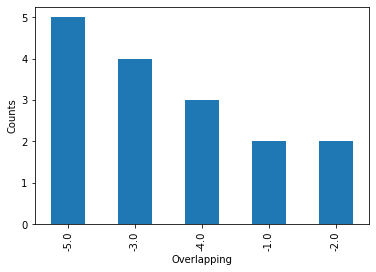

In [135]:
ax = df['overlapping'].value_counts().plot(kind='bar')
ax.set_xlabel("Overlapping")
ax.set_ylabel("Counts")

In [136]:
df['overlapping'].count()

16

In [137]:
val = df['overlapping'].value_counts()
dict(val)

{-5.0: 5, -3.0: 4, -4.0: 3, -1.0: 2, -2.0: 2}

In [138]:
def percentage(pair):
  key,val = pair
  if int(key) > -3:
    return True
  else:
    return False

In [139]:
filtered = dict(filter(percentage, dict(val).items()))

In [140]:
sum(filtered.values())

4

In [141]:
df['overlapping-percentage'] =f"{(sum(filtered.values())/df['overlapping'].count())*100}%"

In [142]:
df.head()

,RSRP_avg_Serving,RSRQ_avg_Serving,cellid_Serving,dlearfcn,latitude,longitude,MR_count,time_key,Cellid_Nb1,RSRP_Nb1,Cellid_Nb2,RSRP_Nb2,Cellid_Nb3,RSRP_Nb3,Cellid_Nb4,RSRP_Nb4,overlapping,overlapping-percentage
geohash,,,,,,,,,,,,,,,,,,
tc0ys802,-92.6,-9.6,6651412.0,500.0,6.767664,80.003020,541.0,20230106.0,NaN,-96.6,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,25.0%
tc0yun7q,-99.3,-7.3,6427425.0,41490.0,6.846929,79.984955,6.0,20230106.0,NaN,-103.3,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,25.0%
tc0yyuce,-103.2,-8.9,5435140.0,500.0,6.838281,80.103485,19.0,20230106.0,NaN,-108.2,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,25.0%
tc0yyz4k,-101.9,-12.1,5435137.0,500.0,6.850812,80.104706,17.0,20230106.0,NaN,-102.9,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,25.0%
tc148bd7,-92.0,-8.2,5350659.0,1650.0,6.067793,80.192587,350.0,20230106.0,NaN,-93.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,25.0%
